# Multinomial Logistic Regression

In [12]:
data <- read.csv("../../data/processed/trained_cleaned.csv")
head(data)

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Total_EMI_per_month,Credit_History_Age_Months,Credit_Score_Encoded,Credit_Mix_Encoded,Total_Num_Accounts,Debt_Per_Account,Debt_to_Income_Ratio,Delayed_Payments_Per_Account
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,19114.12,3,4,3,4,5,4,6.27,4,809.98,49.57495,268,2,2,7,115.7114,0.04237600,0.5714286
2,19114.12,3,4,3,4,6,0,11.27,4,809.98,49.57495,269,2,2,7,115.7114,0.04237600,0.0000000
3,19114.12,3,4,3,4,3,8,11.27,4,809.98,49.57495,271,2,2,7,115.7114,0.04237600,1.1428571
4,19114.12,3,4,3,4,3,6,11.27,4,809.98,49.57495,0,1,2,7,115.7114,0.04237600,0.8571429
5,34847.84,2,4,6,1,7,1,7.42,2,605.03,18.81621,320,2,2,6,100.8383,0.01736205,0.1666667
6,34847.84,2,4,6,1,3,3,5.42,2,605.03,18.81621,322,2,2,6,100.8383,0.01736205,0.5000000


In [13]:
library(e1071)
library(caTools)
library(caret)
library(nnet)
library(caret)

In [14]:
data <- read.csv("../../data/processed/smote.csv")


X <- data[, !(names(data) %in% c("Credit_Score_Encoded"))]
y <- as.factor(data$Credit_Score)  


set.seed(42) 
train_index <- createDataPartition(y, p = 0.80, list = FALSE)
X_train <- X[train_index, ]
y_train <- y[train_index]
X_test <- X[-train_index, ]
y_test <- y[-train_index]


In [15]:
# Fitting Naive Bayes Model 
# to training dataset
set.seed(120)  # Setting Seed
multinom_model <- multinom(as.factor(y_train) ~ ., data = data.frame(cbind(X_train, y_train)))
saveRDS(multinom_model, file = "../../models/mlr.rds")
multinom_model

# weights:  57 (36 variable)
initial  value 94371.894209 
iter  10 value 83221.716052
iter  20 value 77605.007649
iter  30 value 74788.694540
iter  40 value 70908.048378
final  value 70907.788227 
converged


Call:
multinom(formula = as.factor(y_train) ~ ., data = data.frame(cbind(X_train, 
    y_train)))

Coefficients:
  (Intercept) Annual_Income Num_Bank_Accounts Num_Credit_Card Interest_Rate
1   6.2418523 -5.396823e-06         0.1007261      -0.1329411   -0.05486642
2   0.3627708 -6.000326e-06         0.2164214      -0.2731228   -0.03540999
  Num_of_Loan Delay_from_due_date Num_of_Delayed_Payment Changed_Credit_Limit
1 -0.11161225         -0.05520424            -0.02293199           0.04665125
2 -0.08789998         -0.08085970             0.02422629           0.01859692
  Num_Credit_Inquiries Outstanding_Debt Total_EMI_per_month
1          -0.11663572    -0.0004849337        0.0007089375
2          -0.07035695    -0.0008497341        0.0012089808
  Credit_History_Age_Months Credit_Mix_Encoded Total_Num_Accounts
1             -6.763849e-07          -2.088059        -0.03221502
2              1.307370e-04           1.118774        -0.05670144
  Debt_Per_Account Debt_to_Income_Ratio Delayed

In [16]:
multinom_model <- readRDS(file = "../../models/mlr.rds")
predictions <- predict(multinom_model, newdata = X_test, type = "class")  # Use type = "class" for class predictions

 

In [17]:
#C matrix
confusion_matrix <- confusionMatrix(predictions, y_test)
print(confusion_matrix)

Confusion Matrix and Statistics

          Reference
Prediction    0    1    2
         0 4426 1837 1151
         1 2374 7052  761
         2  931 1039 1903

Overall Statistics
                                          
               Accuracy : 0.6231          
                 95% CI : (0.6166, 0.6296)
    No Information Rate : 0.4623          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3964          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity            0.5725   0.7103  0.49882
Specificity            0.7826   0.7285  0.88844
Pos Pred Value         0.5970   0.6923  0.49135
Neg Pred Value         0.7649   0.7452  0.89137
Prevalence             0.3600   0.4623  0.17766
Detection Rate         0.2061   0.3284  0.08862
Detection Prevalence   0.3453   0.4744  0.18036
Balanced Accuracy      0.6775

In [18]:

# Extract TP, TN, FP, FN from the confusion matrix
TP <- confusion_matrix$table[2, 2]  # True Positives
TN <- confusion_matrix$table[1, 1]  # True Negatives
FP <- confusion_matrix$table[1, 2]  # False Positives
FN <- confusion_matrix$table[2, 1]  # False Negatives

# Calculate accuracy
accuracy <- sum(diag(confusion_matrix$table)) / sum(confusion_matrix$table)

# Calculate precision
precision <- TP / (TP + FP)

# Calculate recall (sensitivity)
recall <- TP / (TP + FN)

# Calculate F1 score
f1_score <- 2 * ((precision * recall) / (precision + recall))

# Calculate specificity
specificity <- TN / (TN + FP)

# Print the metrics
cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall (Sensitivity):", recall, "\n")
cat("F1 Score:", f1_score, "\n")
cat("Specificity:", specificity, "\n")

Accuracy: 0.6231256 
Precision: 0.7933401 
Recall (Sensitivity): 0.7481434 
F1 Score: 0.7700792 
Specificity: 0.7066901 


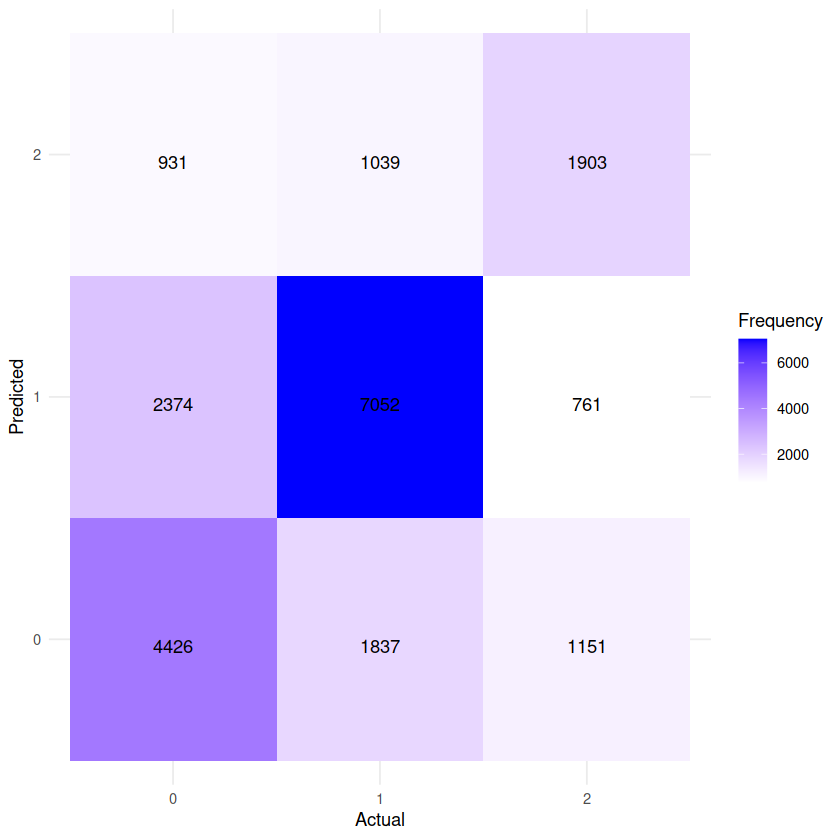

In [19]:
# Visualize the confusion matrix
plot_confusion <- ggplot(as.data.frame(confusion_matrix$table), aes(x = Reference, y = Prediction, fill = Freq)) +
  geom_tile() +
  geom_text(aes(label = Freq), vjust = 1) +
  scale_fill_gradient(low = "white", high = "blue") +
  labs(x = "Actual", y = "Predicted", fill = "Frequency") +
  theme_minimal()

# Print the plot
print(plot_confusion)

In [20]:
cm <- table(y_test, predictions)
cm

      predictions
y_test    0    1    2
     0 4426 2374  931
     1 1837 7052 1039
     2 1151  761 1903

In [21]:
confusionMatrix(cm)

Confusion Matrix and Statistics

      predictions
y_test    0    1    2
     0 4426 2374  931
     1 1837 7052 1039
     2 1151  761 1903

Overall Statistics
                                          
               Accuracy : 0.6231          
                 95% CI : (0.6166, 0.6296)
    No Information Rate : 0.4744          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.3964          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       

Statistics by Class:

                     Class: 0 Class: 1 Class: 2
Sensitivity            0.5970   0.6923  0.49135
Specificity            0.7649   0.7452  0.89137
Pos Pred Value         0.5725   0.7103  0.49882
Neg Pred Value         0.7826   0.7285  0.88844
Prevalence             0.3453   0.4744  0.18036
Detection Rate         0.2061   0.3284  0.08862
Detection Prevalence   0.3600   0.4623  0.17766
Balanced Accuracy      0.6810   0.7187  0.69136